# BEE2041 Empirical Project - Spotify Tracks In Different Genres

In [173]:
# Importing libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

In [174]:
# Using pandas to create a dataframe with the Spotify's track data
spot_df = pd.read_csv('/Users/valterbarros/Desktop/spotify data/data/spotify-tracks-dataset.csv')

## 1. Data Overview

In [175]:
print('Number of Rows:', spot_df.shape[0])
print('Number of Columns:', spot_df.shape[1])

print('Column Names:' , spot_df.columns)

Number of Rows: 114000
Number of Columns: 21
Column Names: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [176]:
spot_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [177]:
spot_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## 2. Data Cleaning and Preparation

In [178]:
# Checking the columns with missing values
print(spot_df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [179]:
# There is a row with missing missing artist, album and track names. 
# It is likely a song that has been removed from Spotify so we will remove it from the dataset.

display(spot_df[spot_df.isnull().any(axis=1)])

spot_df = spot_df.dropna()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [180]:
# Checking for duplicate values on the 'track_id' column
print('number of duplicates', spot_df.duplicated(subset=['track_id']).sum())

number of duplicates 24259


In [181]:
display(spot_df[spot_df.duplicated(subset=['track_id'])].head(1))

spot_df[spot_df['track_id']=='0CDucx9lKxuCZplLXUz0iX']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


In [182]:
spot_df.drop_duplicates(subset='track_id', inplace=True)
spot_df[spot_df['track_id']=='0CDucx9lKxuCZplLXUz0iX']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


In [183]:
# Another issue we have with the data is the in the 'artists' column. Some songs have featured artists alongside the main artist. 
# Because of this, we will split the 'artists' column into two columns: 'main_artist' and 'featured_artist'. 

spot_df[['main_artist', 'feature']] = spot_df['artists'].str.split(';', n=1, expand=True)

spot_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,main_artist,feature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Gen Hoshino,None
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Ben Woodward,None
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Ingrid Michaelson,ZAYN
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Kina Grannis,None
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Chord Overstreet,None


### 3. Data Analysis - Artists & Genres

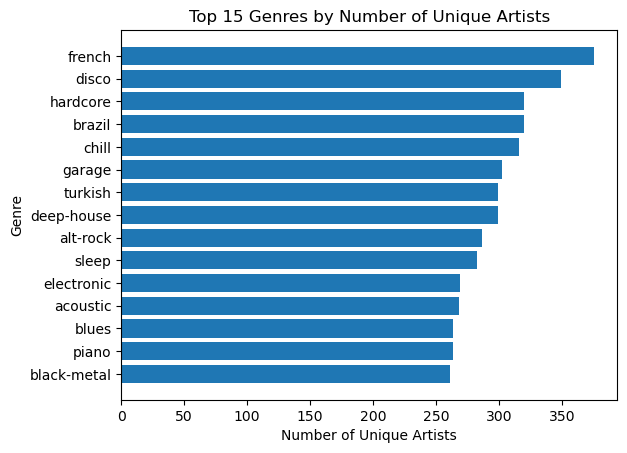

In [184]:
genre_unique_artist = spot_df.groupby('track_genre')['main_artist'].nunique().sort_values(ascending=False).head(15)

plt.barh(genre_unique_artist.index, genre_unique_artist.values)
plt.gca().invert_yaxis()
plt.xlabel('Number of Unique Artists')
plt.ylabel('Genre')

plt.title('Top 15 Genres by Number of Unique Artists')

plt.show()

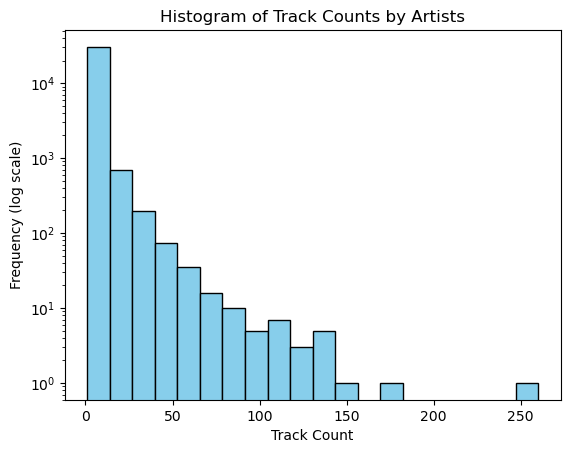

In [185]:
plt.hist(spot_df.groupby('artists')['track_id'].count().sort_values(ascending=False), bins=20, edgecolor='black', color='skyblue')

# Most artists only have a few songs on the dataset. 
# To account for the uneven distribution of songs by artists, we can use a log scale on the y-axis.
plt.yscale('log')

plt.xlabel('Track Count')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Track Counts by Artists')

plt.show()

In [186]:
# To determine the most popular artists, we will calculate the mean popularity of the tracks they have on the dataset.
# Many of them only have one song, which might not be a good indicator of an artist's popularity.
# As a result, we will only consider artists with more than 2 songs in the dataset.

top_artists_df = spot_df.groupby('main_artist').agg({'popularity': 'mean', 'track_genre': pd.Series.mode})\
[spot_df.groupby('main_artist')['track_id'].count().sort_values(ascending=False) > 2] # filtering out artists with 2 songs or less

top_artists_df.columns = ['average_popularity', 'most_common_genre']

top_artists_df = grouped_df.sort_values(by='average_popularity', ascending=False)

top_artists_df.head(15)

/var/folders/bj/9jn0z_990vg0ghj4rs__0f7w0000gn/T/ipykernel_44667/49045582.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_artists_df = spot_df.groupby('main_artist').agg({'popularity': 'mean', 'track_genre': pd.Series.mode})\


,average_popularity,most_common_genre
main_artist,,
Harry Styles,92.000000,pop
Olivia Rodrigo,87.400000,pop
Mora,84.250000,latino
The Kid LAROI,84.000000,hip-hop
IVE,84.000000,k-pop
Morgan Wallen,83.333333,country
One Direction,83.000000,pop
Kendrick Lamar,83.000000,hip-hop
Lil Nas X,82.750000,hip-hop


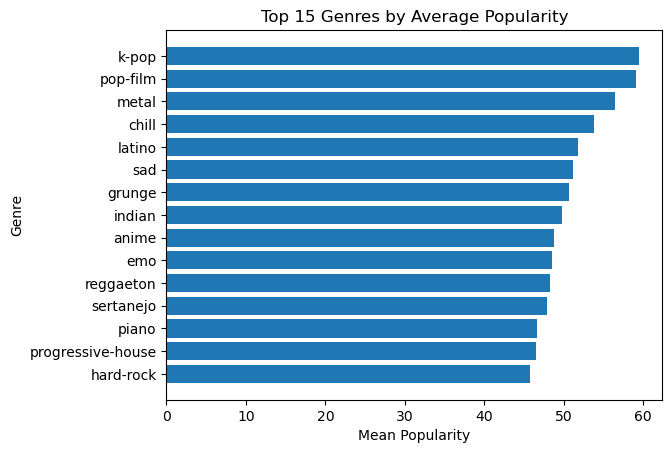

In [187]:
top_genres_df = spot_df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

plt.barh(top_genres_df.index, top_genres_df.values)
plt.gca().invert_yaxis()
plt.xlabel('Mean Popularity')
plt.ylabel('Genre')

plt.title('Top 15 Genres by Average Popularity')

plt.show()